In [2]:
#Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob

#Load data from the 'PhysicalFlows_12.1.G' dataset
DATA_PATH = '../data/PhysicalFlows_12.1.G/*.csv'
files = glob.glob(DATA_PATH)

#Read all csv files and concatenate them into one file
dataframes = []
for f in files:
    csv = pd.read_csv(f, delimiter = '\t')
    dataframes.append(csv)
flow_data = pd.concat(dataframes, ignore_index = True)

#Making sure that the 'DateTime' column is in the right format
flow_data['DateTime'] = pd.to_datetime(flow_data['DateTime'])
# Imports: NO2 is InMapCode (importing from Germany)
imports = flow_data[(flow_data['InMapCode'] == 'NO2') & (flow_data['OutMapCode'] == 'DE_LU')]

# Exports: NO2 is OutMapCode (exporting to Germany)
exports = flow_data[(flow_data['OutMapCode'] == 'NO2') & (flow_data['InMapCode'] == 'DE_LU')]


flow_data



,DateTime,InMapCode,OutMapCode,FlowValue
0,2019-01-01 00:00:00,AL,GR,173.00
1,2019-01-01 01:00:00,AL,GR,145.00
2,2019-01-01 02:00:00,AL,GR,145.00
3,2019-01-01 03:00:00,AL,GR,133.00
4,2019-01-01 04:00:00,AL,GR,130.00
...,...,...,...,...
14402341,2023-12-31 19:00:00,XK,RS,418.85
14402342,2023-12-31 20:00:00,XK,RS,411.11
14402343,2023-12-31 21:00:00,XK,RS,485.37
14402344,2023-12-31 22:00:00,XK,RS,469.40


In [3]:
#Set the DateTime index for resampling
imports.set_index('DateTime', inplace=True)
exports.set_index('DateTime', inplace=True)

#Calculate weekly sums for imports and exports by resampling time series data
weekly_imports = imports['FlowValue'].resample('W').sum()
weekly_exports = exports['FlowValue'].resample('W').sum()

#Calculate weekly net exports 
weekly_net_exports = weekly_exports - weekly_imports

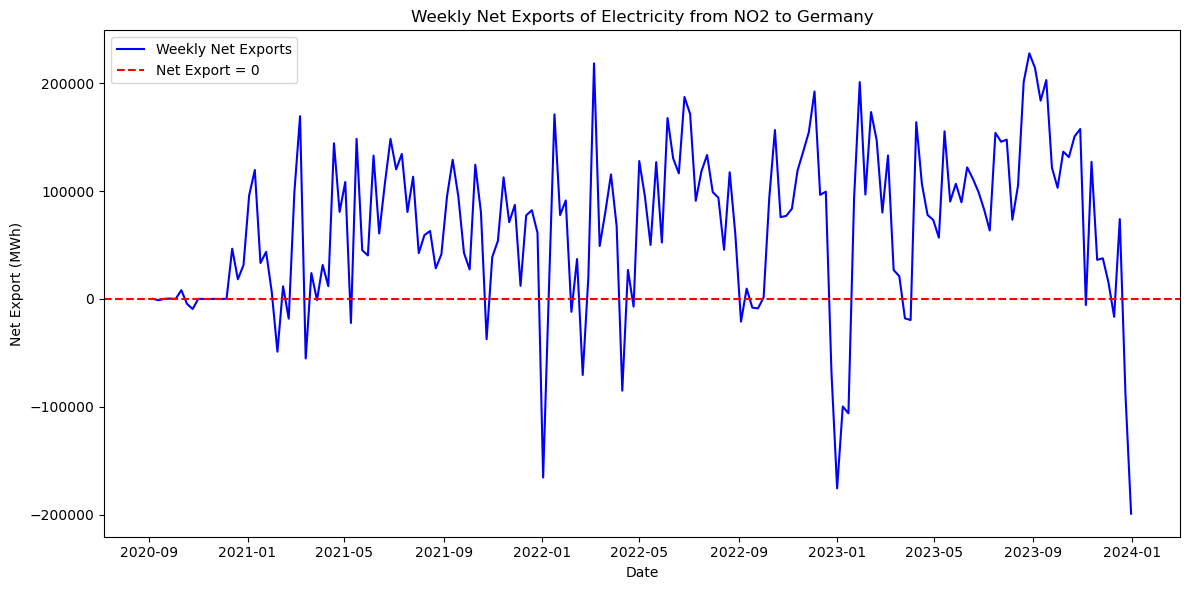

In [7]:
#Plotting and customizing of the figure
plt.figure(figsize=(12, 6))
#No need to write the x axis, as the index from dataframe will be used here by default
plt.plot(weekly_net_exports, label='Weekly Net Exports', color='blue')
plt.axhline(0, color='red', linestyle='--', label='Net Export = 0')

# Customizing the plot
plt.title('Weekly Net Exports of Electricity from NO2 to Germany')
plt.xlabel('Date')
plt.ylabel('Net Export (MWh)')
plt.legend()
plt.tight_layout()

#Saving the figure as png file
plt.savefig('figure_task4.png')
plt.show()

Conclusion:
As the graph shows, NO2 has not always exported more electricity to Germany than we have imported. All the parts of the graph that is located under the horizontal line, reflects a bigger amount of import than export. Example of a time period this happened is 2022-01. The net sum of import is the biggeset usually in January each year (the time of year most civilians use the most electricity for heating). 